# Intro to Linear Regression
Linear regression is often the first model you learn in data science. We'll start with a simple model to predict mission success from distance.


### Import and Load Data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load data
df = pd.read_csv("/Users/amrithaa/Downloads/12DayDataSeries/notebooks/data/mission_data.csv")
df.head()

,mission_id,crew_size,distance_km,fuel_capacity,solar_flare_risk,mental_health_score,anomaly_detected,oxygen_reserve,mission_duration,comm_delay,launch_day_temp,mission_success_score
0,MSN_0000,8,317.087799,956.208955,0.320381,0.824945,0,99.056592,186.719334,7.373760,16.746421,61.214228
1,MSN_0001,5,393.808542,987.381344,0.075308,0.839923,0,93.281835,239.883123,10.512467,13.381213,58.251818
2,MSN_0002,6,347.521192,803.840498,0.416936,1.000000,0,109.872146,208.161597,8.414434,19.095395,55.061198
3,MSN_0003,8,271.154817,709.589856,0.287994,0.772488,0,94.070747,161.257343,6.153192,20.003045,54.498036
4,MSN_0004,4,255.079266,855.196657,0.204623,0.768224,0,123.894461,155.223618,6.161484,16.806871,60.074349


### Visualize X vs Y

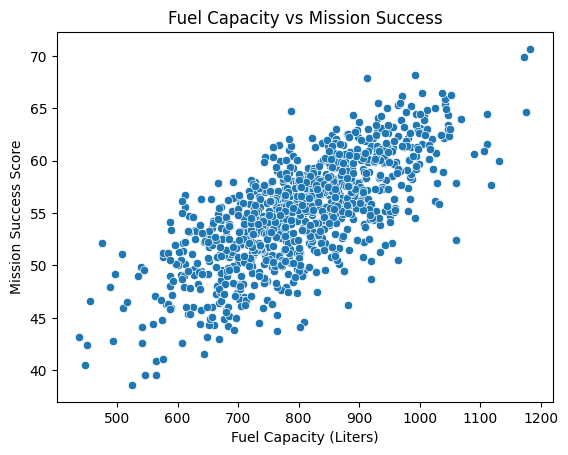

In [11]:
# Pick one feature and one target
X = df[["fuel_capacity"]] # input
y = df["mission_success_score"]  # output

# Plot
sns.scatterplot(x=df["fuel_capacity"], y=df["mission_success_score"])
plt.xlabel("Fuel Capacity (Liters)")
plt.ylabel("Mission Success Score")
plt.title("Fuel Capacity vs Mission Success")
plt.show()

### Fit a Linear Regression Model

In [12]:
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Add predictions to df
df["predicted_success"] = y_pred

# Show coefficients
print(f"Intercept: {model.intercept_:.2f}")
print(f"Slope: {model.coef_[0]:.2f}")


Intercept: 30.41
Slope: 0.03


### Plot Predictions vs Actual

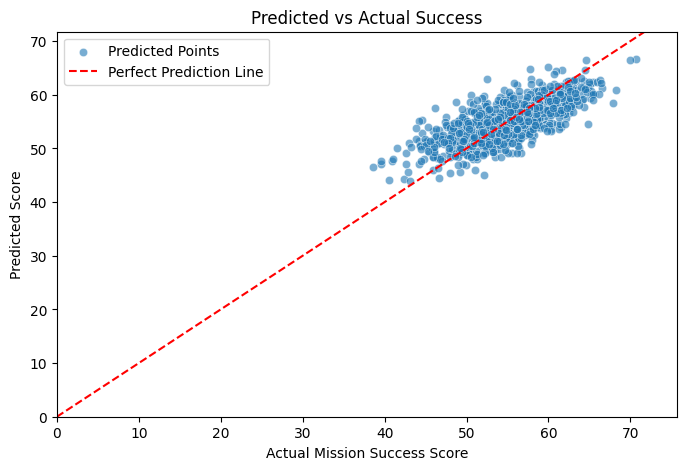

In [13]:
plt.figure(figsize=(8, 5))

# Plot the predicted points
sns.scatterplot(x=y, y=y_pred, alpha=0.6, label="Predicted Points")

# Plot the ideal line (perfect prediction)
plt.plot([0, 100], [0, 100], 'r--', label="Perfect Prediction Line")

# Axis labels and title
plt.xlabel("Actual Mission Success Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Success")

# Axis limits
plt.xlim(0, y.max() + 5)
plt.ylim(0, y_pred.max() + 5)

# Show legend
plt.legend()

plt.show()


### Evaluate the Linear Regression Model

In [14]:
# Error Metrics
residuals = y - y_pred
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Lin Reg Mean Squared Error (MSE): {mse:.2f}")
print(f"Lin Reg Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Lin Reg R² Score: {r2:.2f}")

Lin Reg Mean Squared Error (MSE): 11.31
Lin Reg Root Mean Squared Error (RMSE): 3.36
Lin Reg R² Score: 0.54


### Alternatively, Fit a k-Nearest Neighbors Regression Model

In [15]:
from sklearn.neighbors import KNeighborsRegressor

# Create and fit the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# Predict
y_pred_knn = knn_model.predict(X)

# Add predictions to df
df["knn_predicted_success"] = y_pred_knn

### Plot kNN Predictions vs Actual

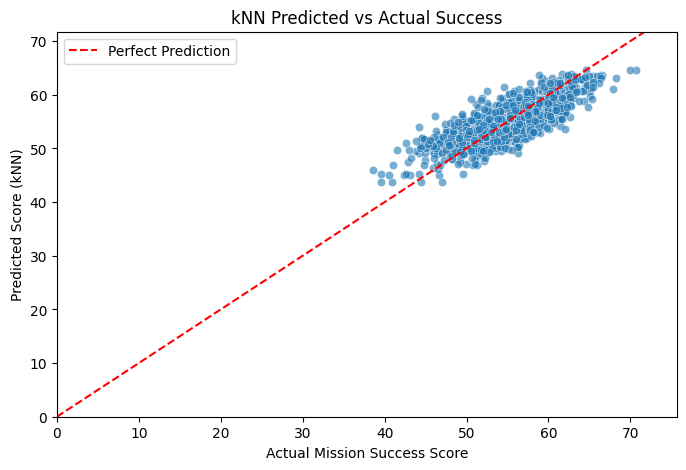

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred_knn, alpha=0.6)
plt.xlabel("Actual Mission Success Score")
plt.ylabel("Predicted Score (kNN)")
plt.title("kNN Predicted vs Actual Success")
plt.plot([0, 100], [0, 100], 'r--', label="Perfect Prediction")

# Axis limits
plt.xlim(0, y.max() + 5)
plt.ylim(0, y_pred.max() + 5)

# Show legend
plt.legend()

plt.show()

### Evaluate the kNN Model

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error Metrics for kNN
residuals_knn = y - y_pred_knn
mse_knn = mean_squared_error(y, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y, y_pred_knn)

print(f"kNN Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"kNN Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"kNN R² Score: {r2_knn:.2f}")


kNN Mean Squared Error (MSE): 8.89
kNN Root Mean Squared Error (RMSE): 2.98
kNN R² Score: 0.64


### Visualize Linear Regression and kNN models

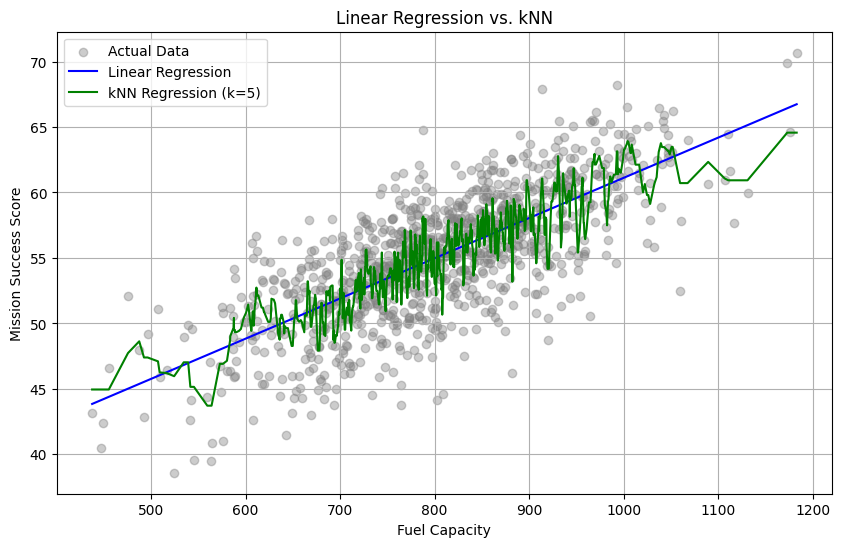

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.4, label="Actual Data")

# Sort for smooth line plotting
sorted_indices = X["fuel_capacity"].argsort()
plt.plot(X["fuel_capacity"].iloc[sorted_indices], 
         y_pred[sorted_indices], 
         color='blue', label='Linear Regression')

plt.plot(X["fuel_capacity"].iloc[sorted_indices], 
         y_pred_knn[sorted_indices], 
         color='green', label='kNN Regression (k=5)')

plt.xlabel("Fuel Capacity")
plt.ylabel("Mission Success Score")
plt.title("Linear Regression vs. kNN")
plt.legend()
plt.grid(True)
plt.show()

### What this tells us:

We started with a *very simple model*, using only one feature, `fuel_capacity` to predict mission success.

- 📉 **Linear Regression** gave us an R² of **0.54**, suggesting that while **there’s some signal**, it’s limited. Fuel capacity alone doesn’t capture the full complexity of what makes a mission successful.
- 📈 **kNN Regression** did better, with an R² of **0.64** and lower error overall. Why? kNN is non-linear and more flexible, allowing it to adapt to patterns that straight-line models might miss.

Still, both models only look at one feature.

So while fuel capacity might play a role, it’s clearly not the full story. Real-world outcomes are shaped by multiple variables: distance, crew health, anomalies, and more.

---

### Takeaway:
Linear regression is a solid baseline, and kNN shows us what flexibility can achieve. But to truly model mission outcomes, we need to go **beyond single variables**.

**That’s where we’re headed next.** 🚀